Before you turn in your homework, make sure everything runs as expected.

Make sure you execute every single code cell, in order, filling with your solutions in any place that says `# YOUR CODE HERE`, and always DELETE the line that says:

```python
raise NotImplementedError()
```

The purpose of this line is to tell you if you forgot to answer a question (it will throw an error if the line is there)

**IMPORTANT:**

* **DO NOT DELETE ANY CELL** and do not change the title of the Notebook.

* Use the same variable names as the ones written in the questions; otherwise, the tests will fail.

* Before you turn in your homework, make sure everything runs as expected: restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Fill your name below:

In [1]:
name = "Yinfeng Ding"

# Sod's test problems

Sod's test problems are standard benchmarks used to assess the accuracy of numerical solvers. The tests use a classic example of one-dimensional compressible flow: the shock-tube problem. Sod (1978) chose initial conditions and numerical discretization parameters for the shock-tube problem and used these to test several schemes, including Lax-Wendroff and MacCormack's. Since then, many others have followed Sod's example and used the same tests on new numerical methods.

The shock-tube problem is so useful for testing numerical methods because it is one of the few problems that allows an exact solution of the Euler equations for compressible flow.

This notebook complements the previous lessons of the course module [_"Riding the wave: convection problems"_](https://github.com/numerical-mooc/numerical-mooc/tree/master/lessons/03_wave) with Sod's test problems as an independent coding exercise. We'll lay out the problem for you, but leave important bits of code for you to write on your own. Good luck!

## What's a shock tube?

A shock tube is an idealized device that generates a one-dimensional shock wave in a compressible gas. The setting allows an analytical solution of the Euler equations, which is very useful for comparing with the numerical results to assess their accuracy. 

Picture a tube with two regions containing gas at different pressures, separated by an infinitely-thin, rigid diaphragm. The gas is initially at rest, and the left region is at a higher pressure than the region to the right of the diaphragm. At time $t = 0.0 s$, the diaphragm is ruptured instantaneously.  

What happens?  

You get a shock wave.  The gas at high pressure, no longer constrained by the diaphragm, rushes into the lower-pressure area and a one-dimensional unsteady flow is established, consisting of:

* a shock wave traveling to the right
* an expansion wave traveling to the left
* a moving contact discontinuity

The shock-tube problem is an example of a *Riemann problem* and it has an analytical solution, as we said. The situation is illustrated in Figure 1.

![shocktube](./figures/shocktube.png)
<center> Figure 1: The shock-tube problem. </center>

## The Euler equations

The Euler equations govern the motion of an inviscid fluid (no viscosity). They consist of the conservation laws of mass and momentum, and often we also need to work with the energy equation. 

Let's consider a 1D flow with velocity $u$ in the $x$-direction. The Euler equations for a fluid with density $\rho$ and pressure $p$ are:

$$
\begin{cases}
    &\frac{\partial \rho}{\partial t} + \frac{\partial}{\partial x}(\rho u) = 0 \\
    &\frac{\partial}{\partial t}(\rho u) + \frac{\partial}{\partial x} (\rho u^2 + p)=0
\end{cases}
$$

... plus the energy equation, which we can write in this form:

$$
\begin{equation}
\frac{\partial}{\partial t}(\rho e_T) + \frac{\partial}{\partial x} (\rho u e_T +p u)=0
\end{equation}
$$

where $e_T=e+u^2/2$ is the total energy per unit mass, equal to the internal energy plus the kinetic energy (per unit mass).

Written in vector form, you can see that the Euler equations bear a strong resemblance to the traffic-density equation that has been the focus of this course module so far. Here is the vector representation of the Euler equation:

$$
\begin{equation}
\frac{\partial }{\partial t} \underline{\mathbf{u}} + \frac{\partial }{\partial x} \underline{\mathbf{f}} = 0
\end{equation}
$$

The big difference with our previous work is that the variables $\underline{\mathbf{u}}$ and $\underline{\mathbf{f}}$ are *vectors*.  If you review the [Phugoid Full Model](https://nbviewer.jupyter.org/github/numerical-mooc/numerical-mooc/blob/master/lessons/01_phugoid/01_03_PhugoidFullModel.ipynb) lesson, you will recall that we can solve for several values at once using the vector form of an equation.  In the Phugoid Module, it was an ODE—now we apply the same procedure to a PDE.  

Let's take a look at what $\underline{\mathbf{u}}$ and $\underline{\mathbf{f}}$ consist of.

## The conservative form

Many works in the early days of computational fluid dynamics in the 1960s showed that using the conservation form of the Euler equations is more accurate for situations with shock waves.  And as you already saw, the shock-tube solutions do contain shocks.

The conserved variables $\underline{\mathbf{u}}$ for Euler's equations are

$$
\begin{equation}
\underline{\mathbf{u}} = \left[
\begin{array}{c}
\rho \\
\rho u \\
\rho e_T \\ 
\end{array}
\right]
\end{equation}
$$

where $\rho$ is the density of the fluid, $u$ is the velocity of the fluid and $e_T = e + \frac{u^2}{2}$ is the specific total energy; $\underline{\mathbf{f}}$ is the flux vector:

$$
\begin{equation}
\underline{\mathbf{f}} = \left[
\begin{array}{c}
\rho u \\
\rho u^2 + p \\
(\rho e_T + p) u \\
\end{array}
\right]
\end{equation}
$$

where $p$ is the pressure of the fluid.

If we put together the conserved variables and the flux vector into our PDE, we get the following set of equations:

$$
\begin{equation}
    \frac{\partial}{\partial t}
    \left[
        \begin{array}{c}
            \rho \\
            \rho u \\
            \rho e_T \\
        \end{array}
    \right] +
    \frac{\partial}{\partial x}
    \left[
        \begin{array}{c}
            \rho u \\
            \rho u^2 + p \\
            (\rho e_T + p) u \\
        \end{array}
    \right] =
    0
\end{equation}
$$

There's one major problem there.  We have 3 equations and 4 unknowns.  But there is a solution!  We can use an equation of state to calculate the pressure—in this case, we'll use the ideal gas law.

## Calculating the pressure

For an ideal gas, the equation of state is

$$
e = e(\rho, p) = \frac{p}{(\gamma -1) \rho}
$$

where $\gamma = 1.4$ is a reasonable value to model air, 

$$
\therefore p = (\gamma -1)\rho e
$$ 

Recall from above that

$$
e_T = e+\frac{1}{2} u^2
$$

$$
\therefore e = e_T - \frac{1}{2}u^2
$$

Putting it all together, we arrive at an equation for the pressure

$$
p = (\gamma -1)\left(\rho e_T - \frac{\rho u^2}{2}\right)
$$

## Flux in terms of $\underline{\mathbf{u}}$

With the traffic model, the flux was a function of traffic density.  For the Euler equations, the three equations we have are coupled and the flux *vector* is a function of $\underline{\mathbf{u}}$, the vector of conserved variables:

$$
\underline{\mathbf{f}} = f(\underline{\mathbf{u}})
$$

In order to get everything squared away, we need to represent $\underline{\mathbf{f}}$ in terms of $\underline{\mathbf{u}}$.
We can introduce a little shorthand for the $\underline{\mathbf{u}}$ and $\underline{\mathbf{f}}$ vectors and define:

$$
\underline{\mathbf{u}} =
\left[
    \begin{array}{c}
        u_1 \\
        u_2 \\
        u_3 \\
    \end{array}
\right] =
\left[
    \begin{array}{c}
        \rho \\
        \rho u \\
        \rho e_T \\
    \end{array}
\right]
$$

$$
\underline{\mathbf{f}} =
\left[
    \begin{array}{c}
        f_1 \\
        f_2 \\
        f_3 \\
    \end{array}
\right] =
\left[
    \begin{array}{c}
        \rho u \\
        \rho u^2 + p \\
        (\rho e_T + p) u \\
    \end{array}
\right]
$$  

With a little algebraic trickery, we can represent the pressure vector using quantities from the $\underline{\mathbf{u}}$ vector.

$$
p = (\gamma -1)\left(u_3 - \frac{1}{2} \frac{u^2_2}{u_1} \right)
$$

Now that pressure can be represented in terms of $\underline{\mathbf{u}}$, the rest of $\underline{\mathbf{f}}$ isn't too difficult to resolve:

$$\underline{\mathbf{f}} = \left[ \begin{array}{c}
f_1 \\
f_2 \\
f_3 \\ \end{array} \right] =
\left[ \begin{array}{c}
u_2\\
\frac{u^2_2}{u_1} + (\gamma -1)\left(u_3 - \frac{1}{2} \frac{u^2_2}{u_1} \right) \\
\left(u_3 + (\gamma -1)\left(u_3 - \frac{1}{2} \frac{u^2_2}{u_1}\right) \right) \frac{u_2}{u_1}\\ \end{array}
\right]$$

## Test conditions

The first test proposed by Sod in his 1978 paper is as follows.  

In a tube spanning from $x = -10 \text{m}$ to $x = 10 \text{m}$ with the rigid membrane at $x = 0 \text{m}$, we have the following initial gas states:

$$
\underline{IC}_L =
\left[
    \begin{array}{c}
        \rho_L \\
        u_L \\
        p_L \\
    \end{array}
\right] =
\left[
    \begin{array}{c}
        1.0 \, kg/m^3 \\
        0 \, m/s \\
        100 \, kN/m^2 \\
    \end{array}
\right]
$$

$$
\underline{IC}_R =
\left[
    \begin{array}{c}
        \rho_R \\
        u_R \\
        p_R \\
    \end{array}
\right] =
\left[
    \begin{array}{c}
        0.125 \, kg/m^3 \\
        0 \, m/s \\
        10 \, kN/m^2 \\
    \end{array}
\right]
$$

where $\underline{IC}_L$ are the initial density, velocity and pressure on the left side of the tube membrane and $\underline{IC}_R$ are the initial density, velocity and pressure on the right side of the tube membrane.  

The analytical solution to this test for the velocity, pressure and density, looks like the plots in Figure 2.

![shock_analytic](./figures/shock_tube_.01.png)
<center> Figure 2. Analytical solution for Sod's first test. </center>

## The Richtmyer method

For this exercise, you will use the **Lax-Friedrichs** scheme that we implemented in [lesson 2](https://nbviewer.jupyter.org/github/numerical-mooc/numerical-mooc/blob/master/lessons/03_wave/03_02_convectionSchemes.ipynb).
But, we will also be using a new scheme called the **Richtmyer** method.
Like the MacCormack method, Richtmyer is a *two-step method*, given by:

$$
\begin{align}
\underline{\mathbf{u}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} &= \frac{1}{2} \left( \underline{\mathbf{u}}^n_{i+1} + \underline{\mathbf{u}}^n_i \right) - 
\frac{\Delta t}{2 \Delta x} \left( \underline{\mathbf{f}}^n_{i+1} - \underline{\mathbf{f}}^n_i\right) \\
\underline{\mathbf{u}}^{n+1}_i &= \underline{\mathbf{u}}^n_i - \frac{\Delta t}{\Delta x} \left(\underline{\mathbf{f}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} - \underline{\mathbf{f}}^{n+\frac{1}{2}}_{i-\frac{1}{2}} \right)
\end{align}
$$

The flux vectors used in the second step are obtained by evaluating the flux functions on the output of the first step:

$$
\underline{\mathbf{f}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} = \underline{\mathbf{f}}\left(\underline{\mathbf{u}}^{n+\frac{1}{2}}_{i+\frac{1}{2}}\right)
$$

The first step is like a *predictor* of the solution: if you look closely, you'll see that we are applying a Lax-Friedrichs scheme here. The second step is a *corrector* that applies a leapfrog update. Figure 3 gives a sketch of the stencil for Richtmyer method, where the "intermediate time" $n+1/2$ will require a temporary variable in your code, just like we had in the MacCormack scheme.

![richtmyer](./figures/richtmyer.png)
<center> Figure 3. Stencil of Richtmyer scheme. </center>

## Implement your solution (40 points)

---

Your mission, should you wish to accept it, is to calculate the pressure, density and velocity along the shock tube at time $t = 0.01 s$ using the Richtmyer method **and** the Lax-Friedrichs method. Good luck!

Code parameters to use:

* Number of discrete points along the 1D domain: `nx = 81` (which gives `dx = 0.25` for a domain of length 20).
* Time-step size: `dt = 0.0002`.
* Heat capacity ratio: `gamma = 1.4`.

Implement your solution in this section.
You can use as many code cells as you want.

In [2]:
# YOUR CODE HERE
import numpy
import sympy
from matplotlib import pyplot
%matplotlib inline

In [3]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16
sympy.init_printing()

In [4]:
# Set parameters.
nx = 81
dx = 0.25
dt = 0.0002
gamma = 1.4
t = 0.01
nt = int(t/dt)+1

In [5]:
# Get the grid point coordinates.
x = numpy.linspace(-10,10,num = nx)

# Set the initial conditions.
rho0 = numpy.ones(nx)
mask = numpy.where(x >= 0)
rho0[mask] = 0.125
p0 = 100000*numpy.ones(nx)
p0[mask] = 10000
v0 = numpy.zeros(nx)
e0 = p0 / ((gamma-1) * rho0)
eT0 = e0 + 0.5 * v0**2

u0 = numpy.array([rho0,
                 rho0*v0,
                 rho0*eT0])
f0 = numpy.array([u0[1],
                 u0[1]**2 / u0[0] + (gamma-1)*(u0[2] - 0.5*u0[1]**2 / u0[0]),
                 (u0[2] + (gamma - 1) * (u0[2] - 0.5*u0[1]**2 / u0[0])) * u0[1] / u0[0]])

In [6]:
# Richtmyer scheme, two step method, R1, R2
u_R2 = u0.copy()
u_R1 = u_R2.copy()
f_R2 = f0.copy()

for i in range(1, nt):
    u_R1 = 0.5 * (u_R2[:,1:] + u_R2[:,:-1]) - dt / (2 * dx) * (f_R2[:,1:] - f_R2[:,:-1])# first step is like a predictor of the solution
    f_R1 = numpy.array([u_R1[1],
                        u_R1[1]**2 / u_R1[0] + (gamma - 1) * (u_R1[2] - 0.5 * u_R1[1]**2 / u_R1[0]),
                        (u_R1[2] + (gamma -1) * (u_R1[2] - 0.5 * u_R1[1]**2 / u_R1[0])) * u_R1[1] / u_R1[0]])
    u_R2[:,1:-1] = u_R2[:,1:-1] - dt / dx * (f_R1[:,1:] - f_R1[:,:-1])# corrector that applies a leapfrog update, advance in time
    f_R2 = numpy.array([u_R2[1],
                        u_R2[1]**2 / u_R2[0] + (gamma - 1) * (u_R2[2] - 0.5 * u_R2[1]**2 / u_R2[0]),
                       (u_R2[2] + (gamma -1) * (u_R2[2] - 0.5 * u_R2[1]**2 / u_R2[0])) * u_R2[1] / u_R2[0]])

rho_Richtmyer = u_R2[0]
v_Richtmyer = u_R2[1] / u_R2[0]
p_Richtmyer = (gamma -1) * (u_R2[2] - 0.5 * u_R2[1]**2 / u_R2[0])

In [7]:
# Lax-Friedrichs scheme
u_L = u0.copy()
f_L = f0.copy()
for n in range(1, nt):
    # Advance in time using Lax-Friedrichs scheme.
    u_L[:,1:-1] = 0.5*(u_L[:,:-2] + u_L[:,2:]) - 0.5*dt/dx * (f_L[:,2:] - f_L[:,:-2])
    f_L = numpy.array([u_L[1],
                      u_L[1]**2 / u_L[0] + (gamma - 1) * (u_L[2] - 0.5 * u_L[1]**2 / u_L[0]),
                     (u_L[2] + (gamma -1) * (u_L[2] - 0.5 * u_L[1]**2 / u_L[0])) * u_L[1] / u_L[0]])
rho_Lax = u_L[0]
v_Lax = u_L[1] / u_L[0]
p_Lax = (gamma -1) * (u_L[2] - 0.5 * u_L[1]**2 / u_L[0])

## Assessment (80 points)

---

Answer questions in this section.

Do not try to delete or modify empty code cells that are already present.
For each question, provide your answer in the cell **just above** the empty cell.
(This empty cell contains hidden tests to assert the correctness of your answer and cannot be deleted.)
Pay attention to the name of the variables we ask you to create to store computed values; if the name of the variable is misspelled, the test will fail.

In [8]:
try:
    import mooc37 as mooc
except:
    import mooc36 as mooc

* **Q1 (10 points):** Plot the numerical solution of the density, velocity, and pressure at time $t = 0.01 s$ obtained with the Richtmyer scheme **and** with the Lax-Friedrichs scheme.

You should also plot the analytical solution.
The analytical solution can be obtained using the function `analytical_solution` from the Python file `sod.py` (located in the same folder than the Jupyter Notebook).
To import the function in your Notebook, use `from sod import analytical_solution`.
You can use `help(analytical_solution)` to see how you should call the function.

Create one figure per variable and make sure to label your axes.
(For example, the first figure should contain the numerical solution of the density using both schemes, as well as the analytical solution for the density.)
Make sure to add a legend to your plots.

In [9]:
# YOUR CODE HERE
from sod import analytical_solution
help(analytical_solution)

Help on function analytical_solution in module sod:

analytical_solution(t, x, left_state, right_state, diaphragm=0.0, gamma=1.4)
    Compute the analytical solution of the Sod's test at a given time.
    
    Parameters
    ----------
    t : float
        The time.
    x : numpy.ndarray
        Coordinates along the tube (as a 1D array of floats).
    left_state : tuple or list
        Initial density, velocity, and pressure values
        on left side of the diaphragm.
        The argument should be a tuple or list with 3 floats.
    right_state : tuple or list
        Initial density, velocity, and pressure values
        on right side of the diaphragm.
        The argument should be a tuple or list with 3 floats.
    diaphragm : float, optional
        Location of the diaphgram (membrane), by default 0.0.
    gamma : float, optional
        Heat capacity ratio, by default 1.4.
    
    Returns
    -------
    tuple of numpy.ndarray objects
        The density, velocity, and pressu

In [10]:
# Analytical solution
# Set the initial conditions.
left_state = [1.0, 0.0, 100000.0]
right_state = [0.125, 0.0, 10000.0]

# Analytical solution at t = 0.01
A = analytical_solution(t, x, left_state, right_state, diaphragm=0.0, gamma=1.4)
rho_analytical = A[0]
v_analytical = A[1]
p_analytical = A[2]

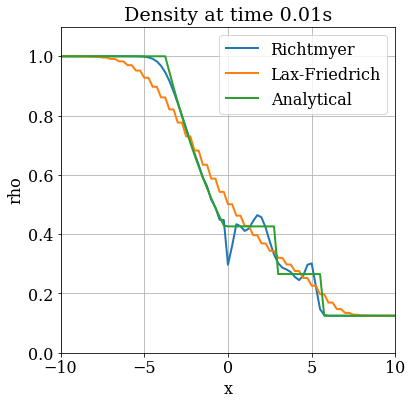

In [11]:
# Plot rho
pyplot.figure(figsize=(6.0, 6.0))
pyplot.title('Density at time 0.01s')
pyplot.xlabel('x')
pyplot.ylabel('rho')
pyplot.grid()
pyplot.plot(x, rho_Richtmyer, label='Richtmyer', color='C0', linestyle='-', linewidth=2)
pyplot.plot(x, rho_Lax, label='Lax-Friedrich', color='C1', linestyle='-', linewidth=2)
pyplot.plot(x, rho_analytical, label='Analytical', color='C2', linestyle='-', linewidth=2)
pyplot.legend()
pyplot.xlim(-10.0, 10.0)
pyplot.ylim(0.0, 1.1)

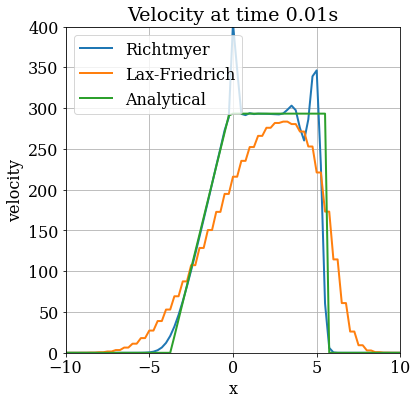

In [12]:
# Plot velocity
pyplot.figure(figsize=(6.0, 6.0))
pyplot.title('Velocity at time 0.01s')
pyplot.xlabel('x')
pyplot.ylabel('velocity')
pyplot.grid()
pyplot.plot(x, v_Richtmyer, label='Richtmyer', color='C0', linestyle='-', linewidth=2)
pyplot.plot(x, v_Lax, label='Lax-Friedrich', color='C1', linestyle='-', linewidth=2)
pyplot.plot(x, v_analytical, label='Analytical', color='C2', linestyle='-', linewidth=2)
pyplot.legend()
pyplot.xlim(-10.0, 10.0)
pyplot.ylim(0.0, 400.0)

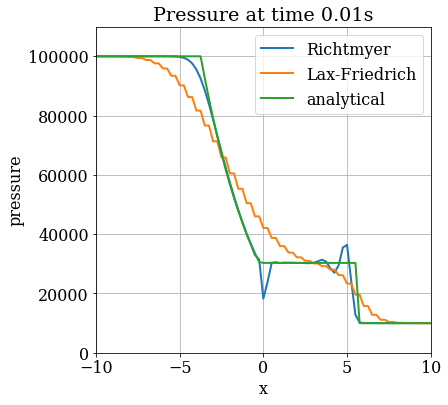

In [13]:
# Plot pressure
pyplot.figure(figsize=(6.0, 6.0))
pyplot.title('Pressure at time 0.01s')
pyplot.xlabel('x')
pyplot.ylabel('pressure')
pyplot.grid()
pyplot.plot(x, p_Richtmyer, label='Richtmyer', color='C0', linestyle='-', linewidth=2)
pyplot.plot(x, p_Lax, label='Lax-Friedrich', color='C1', linestyle='-', linewidth=2)
pyplot.plot(x, p_analytical, label='analytical', color='C2', linestyle='-', linewidth=2)
pyplot.legend()
pyplot.xlim(-10.0, 10.0)
pyplot.ylim(0.0, 110000.0)

* **Q2 (10 points):** At $t = 0.01 s$, what type of numerical errors to you observe in the numerical solution obtained with the Richtmyer scheme and with the Lax-Friedrichs scheme? (Diffusion errors? Dispersion errors? Explain why.)

You should write your answer in the following Markdown cell.

YOUR ANSWER HERE

The Richtmyer scheme has dispersion errors. Observing the curve, we can find that the richtmyer scheme curve is closer to the analytical curve, and the curve oscillates, which is achieved through second-order accuracy. Numerical dispersion occurs when a higher order discretisation scheme is used to improve accuracy of the result. Numerical dispersion often takes the form of so-called 'spurious oscillations'. This is due to the truncation error of the discretisation. This is due to the truncation error of the discretisation. A second order upwind method, the leading truncation error is odd. And odd order derivatives contribute to numerical dispersion. 

The Lax-Friedrichs scheme has diffusion errors. substituting  𝜌𝑛𝑖  by the average of its neighbors introduces a first-order error. Numerical diffusion occurs when 1st order discretisation are used. This is due to the truncation error of the discretisation. The truncation is an odd-order method, the leading truncation error is even. Even order derivatives in the truncation error contribute to numerical diffusion.

* **Q3 (5 points):** At $t = 0.01 s$, what's the $L_2$-norm of the difference between the density obtained with the Richtmyer scheme and the analytical solution?

Store your result in the variable `l2_norm1`; you can check your answer by calling the function `mooc.check('hw3_l2_norm1', l2_norm1)`.

**WARNING:** the variable name `l2_norm1` is spelled with the number `1`, **not** the letter `l`.

In [14]:
# YOUR CODE HERE
Diff = rho_Richtmyer - rho_analytical
help(numpy.linalg.norm)
l2_norm1 = numpy.linalg.norm(Diff, ord=2, axis=0)
print(l2_norm1)
mooc.check('hw3_l2_norm1', l2_norm1)

Help on function norm in module numpy.linalg:

norm(x, ord=None, axis=None, keepdims=False)
    Matrix or vector norm.
    
    This function is able to return one of eight different matrix norms,
    or one of an infinite number of vector norms (described below), depending
    on the value of the ``ord`` parameter.
    
    Parameters
    ----------
    x : array_like
        Input array.  If `axis` is None, `x` must be 1-D or 2-D, unless `ord`
        is None. If both `axis` and `ord` are None, the 2-norm of
        ``x.ravel`` will be returned.
    ord : {non-zero int, inf, -inf, 'fro', 'nuc'}, optional
        Order of the norm (see table under ``Notes``). inf means numpy's
        `inf` object. The default is None.
    axis : {None, int, 2-tuple of ints}, optional.
        If `axis` is an integer, it specifies the axis of `x` along which to
        compute the vector norms.  If `axis` is a 2-tuple, it specifies the
        axes that hold 2-D matrices, and the matrix norms of these

* **Q4 (5 points):** At $t = 0.01 s$, what's the $L_2$-norm of the difference between the density obtained with the Lax-Friedrichs scheme and the analytical solution?

Store your result in the variable `l2_norm2`; you can check your answer by calling the function `mooc.check('hw3_l2_norm2', l2_norm2)`.

In [15]:
# YOUR CODE HERE
Diff_2 = rho_Lax - rho_analytical
l2_norm2 = numpy.linalg.norm(Diff_2, ord=2, axis=0)
print(l2_norm2)
mooc.check('hw3_l2_norm2', l2_norm2)

0.4610293528265613
[hw3_l2_norm2] Good job!


* **Q5 (5 points):** At $t = 0.01 s$, what's the value of the density, obtained with Richtmyer scheme, at location $x = 2.5 m$ (in $kg/m^3$)?

Store your result in the variable `rho1`; you can check your answer by calling the function `mooc.check('hw3_rho1', rho1)`.

**WARNING**: the variable name `rho1` is spelled with the number `1`, **not** the letter `l`.

In [16]:
# YOUR CODE HERE
rho1 = rho_Richtmyer[int((2.5+10)/dx)]
print(rho1)
mooc.check('hw3_rho1', rho1)

0.3746914026476011
[hw3_rho1] Good job!


* **Q6 (5 points):** At $t = 0.01 s$, what's the value of the velocity, obtained with Lax-Friedrichs scheme, at location $x = 2.5 m$ (in $m/s$)?

Store your result in the variable `v2`; you can check your answer by calling the function `mooc.check('hw3_v2', v2)`.

In [17]:
# YOUR CODE HERE
v2 = v_Lax[int((2.5+10)/dx)]
print(v2)
mooc.check('hw3_v2', v2)

281.8563023522752
[hw3_v2] Good job!


* **Q7 (5 points):** At $t = 0.01 s$, what's the absolute difference in the pressure, between the analytical solution and the Richtmyer solution, at location $x = 2.5 m$ (in $N/m^2$)?

Store your result in the variable `p_diff`; you can check your answer by calling the function `mooc.check('hw3_p_diff', p_diff)`.

In [18]:
# YOUR CODE HERE
p_R = p_Richtmyer[int((2.5+10)/dx)]
p_A = p_analytical[int((2.5+10)/dx)]
p_diff = abs(p_R - p_A)
print(p_diff)
mooc.check('hw3_p_diff', p_diff)

64.17847424907086
[hw3_p_diff] Good job!


* **Q8 (5 points):** At $t = 0.01 s$, what's the value of the entropy, obtained with Richtmyer scheme, at location $x = -1.5 m$ (in $J/kg/K$)?

The entropy $s$ is defined as:

$$
s = \frac{p}{\rho^\gamma}
$$

Store your result in the variable `s1`; you can check your answer by calling the function `mooc.check('hw3_s1', s1)`.

**WARNING**: the variable name `s1` is spelled with the number `1`, **not** the letter `l`.

In [19]:
# YOUR CODE HERE
rho_Rs = rho_Richtmyer[int((10-1.5)/dx)]
p_Rs = p_Richtmyer[int((10-1.5)/dx)]
s1 = p_Rs / rho_Rs**gamma
print(s1)
mooc.check('hw3_s1', s1)

100697.043028669
[hw3_s1] Good job!


* **Q9 (5 points):** At $t = 0.01 s$, what's the value of the speed of sound, obtained with Lax-Friedrichs scheme, at location $x = -1.5 m$ (in $m/s$)?

The speed of sound $a$ is defined as:

$$
a = \sqrt{\frac{\gamma p}{\rho}}
$$

Store your result in the variable `a2`; you can check your answer by calling the function `mooc.check('hw3_a2', a2)`.

In [20]:
# YOUR CODE HERE
rho_La = rho_Lax[int((10-1.5)/dx)]
p_La = p_Lax[int((10-1.5)/dx)]
a2 = (gamma * p_La / rho_La)**0.5
print(a2)
mooc.check('hw3_a2', a2)

349.455377505974
[hw3_a2] Good job!


* **Q10 (5 points):** At $t = 0.01 s$, what's the value of the Mach number, obtained with Richtmyer scheme, at location $x = -1.5 m$?

**Hint:** the Mach number is the ratio between the velocity and the speed of sound.

Store your result in the variable `M1`; you can check your answer by calling the function `mooc.check('hw3_M1', M1)`.

**WARNING**: the variable name `M1` is spelled with the number `1`, **not** the letter `l`.

In [21]:
# YOUR CODE HERE
# Mach number = velocity / speed of sound
rho_Ra = rho_Richtmyer[int((10-1.5)/dx)]
p_Ra = p_Richtmyer[int((10-1.5)/dx)]
aR = (gamma * p_Ra / rho_Ra)**0.5
v_Ra = v_Richtmyer[int((10-1.5)/dx)]
M1 = v_Ra/aR
print(M1)
mooc.check('hw3_M1', M1)

0.5483352954050432
[hw3_M1] Good job!


## Reference

---

* Sod, Gary A. (1978), "A survey of several finite difference methods for systems of nonlinear hyperbolic conservation laws," *J. Comput. Phys.*, Vol. 27, pp. 1–31 DOI: [10.1016/0021-9991(78)90023-2](http://dx.doi.org/10.1016%2F0021-9991%2878%2990023-2) // [PDF from unicamp.br](http://www.fem.unicamp.br/~phoenics/EM974/TG%20PHOENICS/BRUNO%20GALETTI%20TG%202013/a%20survey%20of%20several%20finite%20difference%20methods%20for%20systems%20of%20nonlinear%20hyperbolic%20conservation%20laws%20Sod%201978.pdf), checked Oct. 28, 2014.